In [1]:
import os
import tqdm
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import wandb
# from pytorch_lightning import seed_everything
import clip

from hatememe.config import CFG
from hatememe.dataset import HMDataset
from hatememe.architecture import HMMLP
from logging import log

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

/home/toluwani/anaconda3/envs/hawau/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = CFG()

In [3]:
eager_transform = False
device = torch.device(cfg.device if torch.cuda.is_available() else "cpu")

In [4]:
# !unzip -o -q ../hateful_memes.zip -d $HOME/.cache/torch/mmf/data/datasets/
# !mkdir -p $HOME/.cache/torch/mmf/data/datasets/hateful_memes/defaults/{images,annotations,features/{train,test,val}}
# !mv  $HOME/.cache/torch/mmf/data/datasets/img $HOME/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/
# !mv $HOME/.cache/torch/mmf/data/datasets/*.jsonl $HOME/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/

In [4]:
train_dataset = HMDataset(
        cfg.images_path,
        os.path.join(cfg.annotations_path,'train_updated.jsonl'),
        image_transform=cfg.image_transform,
        text_transform=cfg.text_transform,
        eager_transform=eager_transform
    )

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help` for usage information.


/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help` for usage information.




In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=cfg.batch_size, shuffle=True, num_workers=30)

In [7]:
for i, data in  enumerate(train_dataloader):
    images, texts, labels = data
    images, texts, labels = images.to(device), texts.to(device), labels.to(device)

In [8]:
with torch.no_grad():
    img_extract = cfg.image_feature_extractor(images)
    text_extract = cfg.text_feature_extractor(texts.squeeze())


In [10]:
features = torch.hstack((img_extract, text_extract))

In [12]:
arr = features.to('cpu').numpy()

In [16]:
X = TSNE(n_components=2, learning_rate='auto',\
                  init='random', perplexity=3).fit_transform(arr)

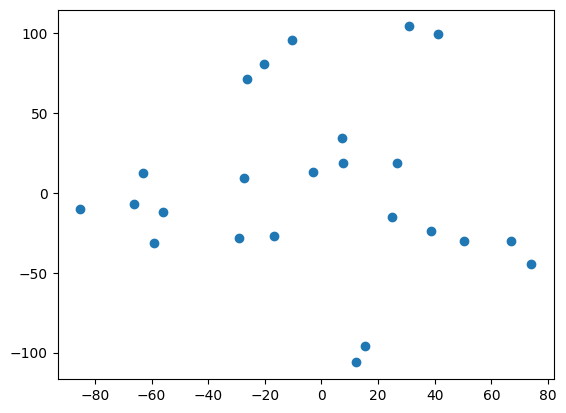

In [19]:
plt.scatter(X[:, 0], X[:, 1])